### GradientBoostingMachine

### GBM
    Decision Tree --> Ensemble 알고리즘
    1) Bagging 알고리즘 --> RandomForest Machine
    2) Boosting 알고리즘 --> GradientBoosting Machine

    Boosting 알고리즘의 대표적인 구현에는 GradientBoosting이 있다.
    모델을 학습-예측하면서 잘못예측한 데이타에 가중치 부여를 통해서 
    오류를 개선해 나가면서 학습하는 방식이다. 
    이때 가중치를 업데이트 하는 방법으로 경사하강법(Gradient Descent)를 이용한다.

    결정트리 방식보다 GradientBoosting이방식이 더 고도화 되어지고 좋아진 반면에
    각 모델에서 사용할수 있는 hyperparameter들도 늘어난다.
    
    결과적으로 이 모델 학습방식은 hyperparameter에 따라서 성능에 큰 차이를 보인다.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cancer = load_breast_cancer()

In [3]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, random_state=0)

In [26]:
# 1. 훈련세트 정확도 1이 나옴... 일반화 , 가지치기
# 2. Boosting 기법중에서 가장 중요한 하이퍼파리미터...learning_rate 값 부여
#gbm = GradientBoostingClassifier(random_state=0) #1.0 / 0.965
#gbm = GradientBoostingClassifier(random_state=0, max_depth=1) #0.991 / 0.972
gbm = GradientBoostingClassifier(random_state=0, learning_rate=0.01) #0.988 / 0.965
#gbm = GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=3)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [27]:
train_score = gbm.score(X_train,y_train)
test_score = gbm.score(X_test,y_test)
print('훈련세트 정확도 : {:.3f}'.format(train_score))
print('테스트세트 정확도 : {:.3f}'.format(test_score))

훈련세트 정확도 : 0.988
테스트세트 정확도 : 0.965


### 특성중요도 시각화

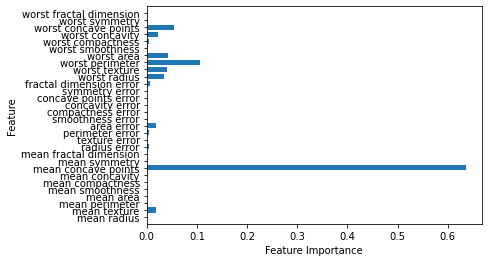

In [28]:
# 특성 중요도 시각화하기
def plot_feature_importances_cancer(gbrt):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), gbrt.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)



plot_feature_importances_cancer(gbm)

### Grid Search
    Grid Search 알고리즘은 우리가 지정해준 몇 가지 잠재적은 Parameter
    후보군 조합중에서 가장 Best 조합을 찾아내는 교차검증 알고리즘이다
    .
    우리가 직접 하나하나 값들을 대입해 가면서 Loss가 가장 낮게 나오는
    파라미터의 조합을 찾아야 하는데 이걸 대신해준다고 생각하면 된다.
    
    SkLearn 패키지에서 제공하는 라이브러리를 임포트만 하면 되기 때문에
    상대적으로 손쉬운 방법이다. (model_selection 서브 모듈 안에 있음)
    
    단점은 최적의 조합을 찾기까지 시간이 오래 걸린다는 점이 있다.

In [29]:
from sklearn.model_selection import GridSearchCV


In [30]:
# 1. 하이퍼파라미터의 조합을 일단 딕셔너리 형태로 생성
param_grid = {
        'n_estimators':[100,150,200,250],
        'max_depth':[4,6,9],
        'learning_rate':[0.1,0.01,0.001]
    
}

In [31]:
# 2. 우리가 적용할 모델을 생성
gmodel = GradientBoostingClassifier()

In [36]:
# 3. GridSearch를 실행 : 1)모델과 파라미터를 가진 GridSearchCV 생성 + 2) GridSearchCV 학습
grid_search = GridSearchCV(
    gmodel,
    param_grid=param_grid,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [4, 6, 9],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=1)

In [37]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 250}

### Best Parameter를 이용해서 GBM 생성

In [38]:
gbm = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=4,n_estimators=250)

gbm.fit(X_train,y_train)


GradientBoostingClassifier(max_depth=4, n_estimators=250, random_state=0)

In [39]:
train_score = gbm.score(X_train,y_train)
test_score = gbm.score(X_test,y_test)
print('훈련세트 정확도 : {:.3f}'.format(train_score))
print('테스트세트 정확도 : {:.3f}'.format(test_score))

훈련세트 정확도 : 1.000
테스트세트 정확도 : 0.965
